# Double 7's (Short Term Trading Strategies that Work)

    1. The SPY is above its 200-day moving average
    2. The SPY closes at a X-day low, buy.
    3. If the SPY closes at a X-day high, sell your long position.
    
    (optimize for number of days)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
#symbol = '^GSPC'
symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
capital = 10000
start = datetime.datetime(1900, 1, 1)
#end = datetime.datetime(2005, 12, 1)
end = datetime.datetime.now()

Define high low trade periods

In [4]:
periods = range(2, 16)
periods = [str(period) for period in periods]

Run Strategy

In [5]:
strategies = pd.Series(dtype=object)
for period in periods:
    print("{0}".format(period), end=" ")
    strategies[period] = strategy.Strategy(symbol, capital, start, end, int(period))
    strategies[period].run()
    strategies[period].tlog, strategies[period].dbal = strategies[period].get_logs()
    strategies[period].stats = strategies[period].get_stats()

2 3 4 5 6 7 8 9 10 11 12 13 14 15 

Summarize results

In [6]:
metrics = ('annual_return_rate',
           'max_closed_out_drawdown',
           'drawdown_annualized_return',
           'drawdown_recovery',
           'best_month',
           'worst_month',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std',
           'pct_time_in_market',
           'total_num_trades',
           'pct_profitable_trades',
           'avg_points')

df = strategy.summary(strategies, metrics)
df

,2,3,4,5,6,7,8,9,10,11,12,13,14,15
annual_return_rate,4.44,6.29,6.86,5.99,7.01,6.96,6.26,5.70,5.72,6.29,6.09,5.65,4.87,5.06
max_closed_out_drawdown,-24.51,-16.37,-15.79,-14.00,-14.03,-16.06,-33.03,-33.07,-30.82,-30.79,-30.75,-30.85,-30.74,-30.67
drawdown_annualized_return,-5.53,-2.60,-2.30,-2.34,-2.00,-2.31,-5.27,-5.80,-5.39,-4.89,-5.05,-5.46,-6.31,-6.07
drawdown_recovery,-1.13,-0.24,-0.05,-0.05,-0.05,-1.84,-0.13,-0.13,-0.13,-0.13,-0.13,-0.13,-0.13,-0.13
best_month,10.00,12.79,12.38,9.94,9.96,12.77,13.53,13.55,16.85,16.82,22.88,22.99,22.87,22.80
worst_month,-11.52,-15.37,-15.09,-13.28,-13.32,-13.32,-31.28,-31.32,-30.82,-30.79,-30.75,-30.85,-30.74,-30.67
sharpe_ratio,0.55,0.71,0.74,0.65,0.75,0.72,0.61,0.57,0.57,0.62,0.59,0.55,0.48,0.51
sortino_ratio,0.41,0.53,0.56,0.49,0.56,0.55,0.42,0.38,0.39,0.42,0.39,0.37,0.32,0.33
monthly_std,2.11,2.08,2.09,2.00,2.06,2.18,2.52,2.41,2.34,2.35,2.42,2.47,2.39,2.34
pct_time_in_market,41.62,38.56,36.49,34.83,33.51,33.24,32.52,30.65,30.68,30.31,30.04,29.93,28.80,27.62


Bar graphs

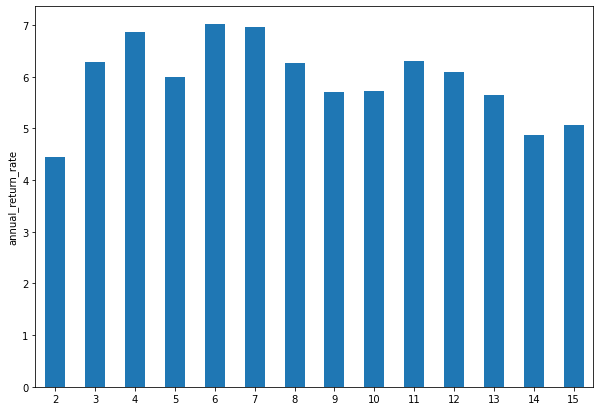

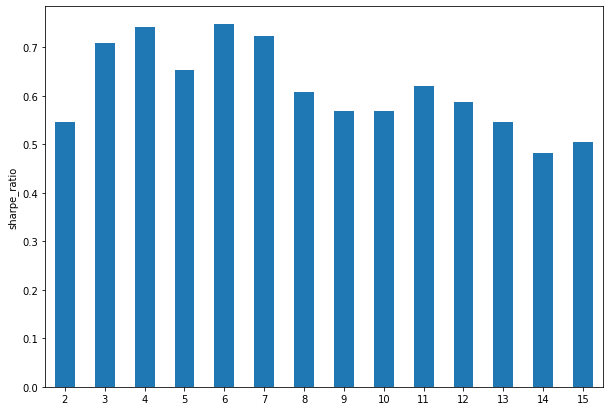

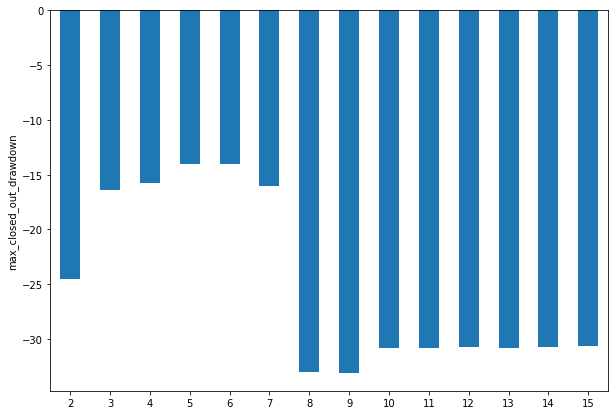

In [7]:
strategy.plot_bar_graph(df, 'annual_return_rate')
strategy.plot_bar_graph(df, 'sharpe_ratio')
strategy.plot_bar_graph(df, 'max_closed_out_drawdown')

Run Benchmark

In [8]:
s = strategies[periods[0]]
benchmark = pf.Benchmark(symbol, capital, s._start, s._end)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()
benchmark.stats = benchmark.get_stats()

1993-11-11 00:00:00 BUY  215 SPY @ 46.38
2020-07-14 00:00:00 SELL 215 SPY @ 316.03


Equity curve

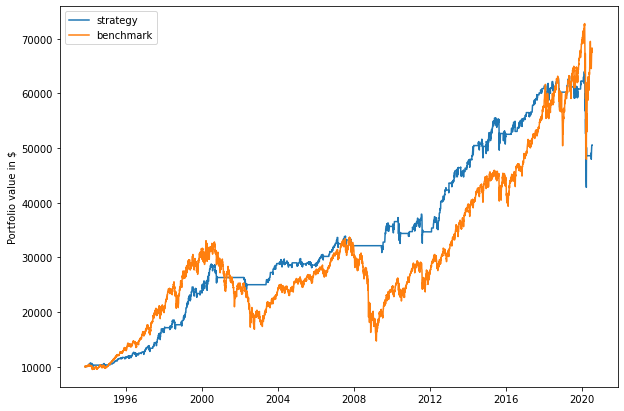

In [9]:
pf.plot_equity_curve(strategies['8'].dbal, benchmark=benchmark.dbal)